In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Merge datarames with tracks, missing tracks, playlists, and artists

In [2]:
# Load files: 
tracks_path = ("Resources/cleaned_tracks.csv")
missing_path = ("Resources/new_tracks.csv.gz")
playlists_path = ("Resources/playlist_frequency.csv")
artists = ("../spotify_data/artists.csv")

In [3]:
# Read files into DataFrames
tracks_df = pd.read_csv(tracks_path)
missing_songs_df = pd.read_csv(missing_path)
playlists_df = pd.read_csv(playlists_path)
artists_df = pd.read_csv(artists)

## Check and adjust/clean the dataframes

In [4]:
tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586659 entries, 0 to 586658
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        586659 non-null  int64  
 1   id                586659 non-null  object 
 2   name              586659 non-null  object 
 3   popularity        586659 non-null  int64  
 4   duration_ms       586659 non-null  int64  
 5   explicit          586659 non-null  int64  
 6   artists           586659 non-null  object 
 7   id_artists        586659 non-null  object 
 8   release_date      586659 non-null  object 
 9   danceability      586659 non-null  float64
 10  energy            586659 non-null  float64
 11  key               586659 non-null  int64  
 12  loudness          586659 non-null  float64
 13  mode              586659 non-null  int64  
 14  speechiness       586659 non-null  float64
 15  acousticness      586659 non-null  float64
 16  instrumentalness  58

In [5]:
tracks_df.tail()

,Unnamed: 0,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
586654,586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,...,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586655,586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,...,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586656,586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,...,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586657,586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,...,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4
586658,586671,5Ocn6dZ3BJFPWh4ylwFXtn,Mar de Emociones,38,214360,0,['Afrosound'],['0i4Qda0k4nf7jnNHmSNpYv'],2015-07-01,0.686,...,6,-7.067,1,0.0363,0.105,0.000000,0.2640,0.9750,112.204,4


In [6]:
# Drop the Unnamed: 0 column
tracks_df = tracks_df.drop('Unnamed: 0', axis=1)

In [7]:
missing_songs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51545 entries, 0 to 51544
Data columns (total 46 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   artists                       51545 non-null  object 
 1   available_markets             51545 non-null  object 
 2   disc_number                   51545 non-null  int64  
 3   duration_ms_x                 51545 non-null  int64  
 4   explicit                      51545 non-null  bool   
 5   href                          51545 non-null  object 
 6   id                            51545 non-null  object 
 7   is_local                      51545 non-null  bool   
 8   name                          51541 non-null  object 
 9   popularity                    51545 non-null  int64  
 10  preview_url                   32961 non-null  object 
 11  track_number                  51545 non-null  int64  
 12  type_x                        51545 non-null  object 
 13  u

In [8]:
missing_songs_df['analysis_url']

0        https://api.spotify.com/v1/audio-analysis/5XJJ...
1        https://api.spotify.com/v1/audio-analysis/1xzn...
2        https://api.spotify.com/v1/audio-analysis/0XUf...
3        https://api.spotify.com/v1/audio-analysis/6O6M...
4        https://api.spotify.com/v1/audio-analysis/1AhD...
                               ...                        
51540    https://api.spotify.com/v1/audio-analysis/48uN...
51541    https://api.spotify.com/v1/audio-analysis/48vB...
51542    https://api.spotify.com/v1/audio-analysis/48vE...
51543    https://api.spotify.com/v1/audio-analysis/48vU...
51544    https://api.spotify.com/v1/audio-analysis/3tqG...
Name: analysis_url, Length: 51545, dtype: object

In [9]:
missing_songs_df.tail()

,artists,available_markets,disc_number,duration_ms_x,explicit,href,id,is_local,name,popularity,...,instrumentalness,liveness,valence,tempo,type_y,uri_y,track_href,analysis_url,duration_ms_y,time_signature
51540,[{'external_urls': {'spotify': 'https://open.s...,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",1,212816,False,https://api.spotify.com/v1/tracks/48uNF8nyBdWg...,48uNF8nyBdWgobrPdJdIkK,False,Gave To Me,30,...,0.609000,0.0864,0.106,150.023,audio_features,spotify:track:48uNF8nyBdWgobrPdJdIkK,https://api.spotify.com/v1/tracks/48uNF8nyBdWg...,https://api.spotify.com/v1/audio-analysis/48uN...,212817.0,4.0
51541,[{'external_urls': {'spotify': 'https://open.s...,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",1,349773,False,https://api.spotify.com/v1/tracks/48vBzvcsyJcV...,48vBzvcsyJcV6t2mJUPjA3,False,One Step Up,31,...,0.012800,0.1480,0.347,73.917,audio_features,spotify:track:48vBzvcsyJcV6t2mJUPjA3,https://api.spotify.com/v1/tracks/48vBzvcsyJcV...,https://api.spotify.com/v1/audio-analysis/48vB...,349773.0,4.0
51542,[{'external_urls': {'spotify': 'https://open.s...,['US'],1,137453,False,https://api.spotify.com/v1/tracks/48vEY7E0fzaa...,48vEY7E0fzaadTjo065bEd,False,Trees,10,...,0.000004,0.9630,0.539,155.772,audio_features,spotify:track:48vEY7E0fzaadTjo065bEd,https://api.spotify.com/v1/tracks/48vEY7E0fzaa...,https://api.spotify.com/v1/audio-analysis/48vE...,137453.0,4.0
51543,[{'external_urls': {'spotify': 'https://open.s...,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",1,293066,False,https://api.spotify.com/v1/tracks/48vU2obDFTN5...,48vU2obDFTN5QqePnc1hDP,False,New Moon (The Meadow),26,...,0.941000,0.0951,0.141,119.983,audio_features,spotify:track:48vU2obDFTN5QqePnc1hDP,https://api.spotify.com/v1/tracks/48vU2obDFTN5...,https://api.spotify.com/v1/audio-analysis/48vU...,293067.0,4.0
51544,[{'external_urls': {'spotify': 'https://open.s...,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",1,184685,True,https://api.spotify.com/v1/tracks/3tqG4wRhHz00...,3tqG4wRhHz00vUMhjfp8QL,False,Walk With Me,9,...,0.000000,0.1090,0.441,98.107,audio_features,spotify:track:3tqG4wRhHz00vUMhjfp8QL,https://api.spotify.com/v1/tracks/3tqG4wRhHz00...,https://api.spotify.com/v1/audio-analysis/3tqG...,184686.0,4.0


In [10]:
# Keep the columns that match columns in tracks_df

# Drop clearly unnecessary columns
missing_songs_df = missing_songs_df.drop(['available_markets', 'disc_number', 'href', 'is_local', 'preview_url', 'track_number', 'type_x', 
                                          'album.available_markets', 'album.external_urls.spotify', 'album.href', 'album.images', 'album.total_tracks',
                                          'album.type', 'album.uri', 'external_ids.isrc', 'external_urls.spotify', 'type_y', 'track_href', 'analysis_url'], axis=1)



In [11]:
missing_songs_df.tail()

,artists,duration_ms_x,explicit,id,name,popularity,uri_x,album.album_type,album.artists,album.id,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,uri_y,duration_ms_y,time_signature
51540,[{'external_urls': {'spotify': 'https://open.s...,212816,False,48uNF8nyBdWgobrPdJdIkK,Gave To Me,30,spotify:track:48uNF8nyBdWgobrPdJdIkK,single,[{'external_urls': {'spotify': 'https://open.s...,4GCE8yEjzrvXXie9tNI93d,...,1.0,0.0954,0.000827,0.609000,0.0864,0.106,150.023,spotify:track:48uNF8nyBdWgobrPdJdIkK,212817.0,4.0
51541,[{'external_urls': {'spotify': 'https://open.s...,349773,False,48vBzvcsyJcV6t2mJUPjA3,One Step Up,31,spotify:track:48vBzvcsyJcV6t2mJUPjA3,album,[{'external_urls': {'spotify': 'https://open.s...,28fqmcfV4mpPsqhdNKUeTc,...,1.0,0.0292,0.034300,0.012800,0.1480,0.347,73.917,spotify:track:48vBzvcsyJcV6t2mJUPjA3,349773.0,4.0
51542,[{'external_urls': {'spotify': 'https://open.s...,137453,False,48vEY7E0fzaadTjo065bEd,Trees,10,spotify:track:48vEY7E0fzaadTjo065bEd,single,[{'external_urls': {'spotify': 'https://open.s...,0Paxbrh4KhwzZrzEtNWOcb,...,0.0,0.0861,0.085100,0.000004,0.9630,0.539,155.772,spotify:track:48vEY7E0fzaadTjo065bEd,137453.0,4.0
51543,[{'external_urls': {'spotify': 'https://open.s...,293066,False,48vU2obDFTN5QqePnc1hDP,New Moon (The Meadow),26,spotify:track:48vU2obDFTN5QqePnc1hDP,album,[{'external_urls': {'spotify': 'https://open.s...,3qGpghjmPixrl9LYUY3rrZ,...,0.0,0.0331,0.959000,0.941000,0.0951,0.141,119.983,spotify:track:48vU2obDFTN5QqePnc1hDP,293067.0,4.0
51544,[{'external_urls': {'spotify': 'https://open.s...,184685,True,3tqG4wRhHz00vUMhjfp8QL,Walk With Me,9,spotify:track:3tqG4wRhHz00vUMhjfp8QL,single,[{'external_urls': {'spotify': 'https://open.s...,2sO7zb0BIxOVEgtNSvists,...,0.0,0.3100,0.222000,0.000000,0.1090,0.441,98.107,spotify:track:3tqG4wRhHz00vUMhjfp8QL,184686.0,4.0


In [12]:
# Drop the rest after inspection
missing_songs_df = missing_songs_df.drop(['uri_x', 'album.album_type', 'album.artists', 'album.id', 'uri_y', 'duration_ms_y'], axis = 1)
missing_songs_df.tail()

,artists,duration_ms_x,explicit,id,name,popularity,album.name,album.release_date,album.release_date_precision,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
51540,[{'external_urls': {'spotify': 'https://open.s...,212816,False,48uNF8nyBdWgobrPdJdIkK,Gave To Me,30,Gave To Me,2017-05-30,day,0.459,...,2.0,-4.976,1.0,0.0954,0.000827,0.609000,0.0864,0.106,150.023,4.0
51541,[{'external_urls': {'spotify': 'https://open.s...,349773,False,48vBzvcsyJcV6t2mJUPjA3,One Step Up,31,"No Shoes, No Shirt, No Problems",2002-04-02,day,0.552,...,5.0,-12.713,1.0,0.0292,0.034300,0.012800,0.1480,0.347,73.917,4.0
51542,[{'external_urls': {'spotify': 'https://open.s...,137453,False,48vEY7E0fzaadTjo065bEd,Trees,10,Trees,2005-10-11,day,0.406,...,1.0,-6.285,0.0,0.0861,0.085100,0.000004,0.9630,0.539,155.772,4.0
51543,[{'external_urls': {'spotify': 'https://open.s...,293066,False,48vU2obDFTN5QqePnc1hDP,New Moon (The Meadow),26,Movie Moods: In The Twilight - 12 Supernatural...,2011-01-01,day,0.573,...,9.0,-15.921,0.0,0.0331,0.959000,0.941000,0.0951,0.141,119.983,4.0
51544,[{'external_urls': {'spotify': 'https://open.s...,184685,True,3tqG4wRhHz00vUMhjfp8QL,Walk With Me,9,Walk With Me,2016-08-19,day,0.774,...,9.0,-2.908,0.0,0.3100,0.222000,0.000000,0.1090,0.441,98.107,4.0


In [13]:
# Drop release date precision
missing_songs_df = missing_songs_df.drop('album.release_date_precision', axis=1)

In [14]:
missing_songs_df = missing_songs_df.drop('album.name', axis=1)

In [15]:
missing_songs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51545 entries, 0 to 51544
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   artists             51545 non-null  object 
 1   duration_ms_x       51545 non-null  int64  
 2   explicit            51545 non-null  bool   
 3   id                  51545 non-null  object 
 4   name                51541 non-null  object 
 5   popularity          51545 non-null  int64  
 6   album.release_date  51545 non-null  object 
 7   danceability        51394 non-null  float64
 8   energy              51394 non-null  float64
 9   key                 51394 non-null  float64
 10  loudness            51394 non-null  float64
 11  mode                51394 non-null  float64
 12  speechiness         51394 non-null  float64
 13  acousticness        51394 non-null  float64
 14  instrumentalness    51394 non-null  float64
 15  liveness            51394 non-null  float64
 16  vale

In [16]:
# Rename columns in playlist DF to match the tracks DF
column_list = tracks_df.columns.tolist()
column_list

['id',
 'name',
 'popularity',
 'duration_ms',
 'explicit',
 'artists',
 'id_artists',
 'release_date',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature']

In [17]:
# Rename columns
missing_songs_df = missing_songs_df.rename(columns={'duration_ms_x': 'duration_ms', 'album.release_date': 'release_date'})

In [18]:
missing_songs_df['artists']

0        [{'external_urls': {'spotify': 'https://open.s...
1        [{'external_urls': {'spotify': 'https://open.s...
2        [{'external_urls': {'spotify': 'https://open.s...
3        [{'external_urls': {'spotify': 'https://open.s...
4        [{'external_urls': {'spotify': 'https://open.s...
                               ...                        
51540    [{'external_urls': {'spotify': 'https://open.s...
51541    [{'external_urls': {'spotify': 'https://open.s...
51542    [{'external_urls': {'spotify': 'https://open.s...
51543    [{'external_urls': {'spotify': 'https://open.s...
51544    [{'external_urls': {'spotify': 'https://open.s...
Name: artists, Length: 51545, dtype: object

### Get the artist names and id

In [19]:
# Copy the original dataframe
artists_info_df = missing_songs_df.copy()

# Split the cell at whitespace and create dataframe
artists_info_df = artists_info_df['artists'].str.split(':', expand=True)
artists_info_df.tail()

,0,1,2,3,4,5,6,7,8,9,...,233,234,235,236,237,238,239,240,241,242
51540,[{'external_urls',{'spotify','https,//open.spotify.com/artist/0M3cZtjQZ8fz3Hbw1A4C...,'https,//api.spotify.com/v1/artists/0M3cZtjQZ8fz3Hbw1...,"'0M3cZtjQZ8fz3Hbw1A4CwF', 'name'","'T-Mass', 'type'","'artist', 'uri'",'spotify,...,None,None,None,None,None,None,None,None,None,None
51541,[{'external_urls',{'spotify','https,//open.spotify.com/artist/3grHWM9bx2E9vwJCdlRv...,'https,//api.spotify.com/v1/artists/3grHWM9bx2E9vwJCd...,"'3grHWM9bx2E9vwJCdlRv9O', 'name'","'Kenny Chesney', 'type'","'artist', 'uri'",'spotify,...,None,None,None,None,None,None,None,None,None,None
51542,[{'external_urls',{'spotify','https,//open.spotify.com/artist/0J7ESdJjIJ5tvkH7r78r...,'https,//api.spotify.com/v1/artists/0J7ESdJjIJ5tvkH7r...,"'0J7ESdJjIJ5tvkH7r78r6c', 'name'","'Marty Casey', 'type'","'artist', 'uri'",'spotify,...,None,None,None,None,None,None,None,None,None,None
51543,[{'external_urls',{'spotify','https,//open.spotify.com/artist/7nI3WkJ9XmtzjVZHwllf...,'https,//api.spotify.com/v1/artists/7nI3WkJ9XmtzjVZHw...,"'7nI3WkJ9XmtzjVZHwllf8n', 'name'","'Michael Omartian', 'type'","'artist', 'uri'",'spotify,...,None,None,None,None,None,None,None,None,None,None
51544,[{'external_urls',{'spotify','https,//open.spotify.com/artist/1q13yHC6Syg5Y8iPLrRn...,'https,//api.spotify.com/v1/artists/1q13yHC6Syg5Y8iPL...,"'1q13yHC6Syg5Y8iPLrRnCq', 'name'","'Joell Ortiz', 'type'","'artist', 'uri'",'spotify,...,None,None,None,None,None,None,None,None,None,None


In [20]:
# Drop nan
artists_info_df.dropna(axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11
0,[{'external_urls',{'spotify','https,//open.spotify.com/artist/5K4W6rqBFWDnAN6FQUkS...,'https,//api.spotify.com/v1/artists/5K4W6rqBFWDnAN6FQ...,"'5K4W6rqBFWDnAN6FQUkS6x', 'name'","'Kanye West', 'type'","'artist', 'uri'",'spotify,artist,"5K4W6rqBFWDnAN6FQUkS6x'}, {'external_urls'"
1,[{'external_urls',{'spotify','https,//open.spotify.com/artist/3TVXtAsR1Inumwj472S9...,'https,//api.spotify.com/v1/artists/3TVXtAsR1Inumwj47...,"'3TVXtAsR1Inumwj472S9r4', 'name'","'Drake', 'type'","'artist', 'uri'",'spotify,artist,"3TVXtAsR1Inumwj472S9r4'}, {'external_urls'"
2,[{'external_urls',{'spotify','https,//open.spotify.com/artist/23zg3TcAtWQy7J6upgbU...,'https,//api.spotify.com/v1/artists/23zg3TcAtWQy7J6up...,"'23zg3TcAtWQy7J6upgbUnj', 'name'","'Usher', 'type'","'artist', 'uri'",'spotify,artist,"23zg3TcAtWQy7J6upgbUnj'}, {'external_urls'"
3,[{'external_urls',{'spotify','https,//open.spotify.com/artist/69GGBxA162lTqCwzJG5j...,'https,//api.spotify.com/v1/artists/69GGBxA162lTqCwzJ...,"'69GGBxA162lTqCwzJG5jLp', 'name'","'The Chainsmokers', 'type'","'artist', 'uri'",'spotify,artist,"69GGBxA162lTqCwzJG5jLp'}, {'external_urls'"
4,[{'external_urls',{'spotify','https,//open.spotify.com/artist/1dfeR4HaWDbWqFHLkxsg...,'https,//api.spotify.com/v1/artists/1dfeR4HaWDbWqFHLk...,"'1dfeR4HaWDbWqFHLkxsg1d', 'name'","'Queen', 'type'","'artist', 'uri'",'spotify,artist,1dfeR4HaWDbWqFHLkxsg1d'}]
...,...,...,...,...,...,...,...,...,...,...,...,...
51540,[{'external_urls',{'spotify','https,//open.spotify.com/artist/0M3cZtjQZ8fz3Hbw1A4C...,'https,//api.spotify.com/v1/artists/0M3cZtjQZ8fz3Hbw1...,"'0M3cZtjQZ8fz3Hbw1A4CwF', 'name'","'T-Mass', 'type'","'artist', 'uri'",'spotify,artist,"0M3cZtjQZ8fz3Hbw1A4CwF'}, {'external_urls'"
51541,[{'external_urls',{'spotify','https,//open.spotify.com/artist/3grHWM9bx2E9vwJCdlRv...,'https,//api.spotify.com/v1/artists/3grHWM9bx2E9vwJCd...,"'3grHWM9bx2E9vwJCdlRv9O', 'name'","'Kenny Chesney', 'type'","'artist', 'uri'",'spotify,artist,3grHWM9bx2E9vwJCdlRv9O'}]
51542,[{'external_urls',{'spotify','https,//open.spotify.com/artist/0J7ESdJjIJ5tvkH7r78r...,'https,//api.spotify.com/v1/artists/0J7ESdJjIJ5tvkH7r...,"'0J7ESdJjIJ5tvkH7r78r6c', 'name'","'Marty Casey', 'type'","'artist', 'uri'",'spotify,artist,0J7ESdJjIJ5tvkH7r78r6c'}]
51543,[{'external_urls',{'spotify','https,//open.spotify.com/artist/7nI3WkJ9XmtzjVZHwllf...,'https,//api.spotify.com/v1/artists/7nI3WkJ9XmtzjVZHw...,"'7nI3WkJ9XmtzjVZHwllf8n', 'name'","'Michael Omartian', 'type'","'artist', 'uri'",'spotify,artist,7nI3WkJ9XmtzjVZHwllf8n'}]


In [21]:
# Get the columns with id and names
d = {'id_artists': artists_info_df[6], 'artists': artists_info_df[7]}

In [22]:
# Create dataframe
artists_info_df = pd.DataFrame(data=d)
artists_info_df

,id_artists,artists
0,"'5K4W6rqBFWDnAN6FQUkS6x', 'name'","'Kanye West', 'type'"
1,"'3TVXtAsR1Inumwj472S9r4', 'name'","'Drake', 'type'"
2,"'23zg3TcAtWQy7J6upgbUnj', 'name'","'Usher', 'type'"
3,"'69GGBxA162lTqCwzJG5jLp', 'name'","'The Chainsmokers', 'type'"
4,"'1dfeR4HaWDbWqFHLkxsg1d', 'name'","'Queen', 'type'"
...,...,...
51540,"'0M3cZtjQZ8fz3Hbw1A4CwF', 'name'","'T-Mass', 'type'"
51541,"'3grHWM9bx2E9vwJCdlRv9O', 'name'","'Kenny Chesney', 'type'"
51542,"'0J7ESdJjIJ5tvkH7r78r6c', 'name'","'Marty Casey', 'type'"
51543,"'7nI3WkJ9XmtzjVZHwllf8n', 'name'","'Michael Omartian', 'type'"


In [23]:
# Remove string 'name' from column
id_artists = artists_info_df['id_artists'].str.replace(", 'name'", '', regex=True)
id_artists

0         '5K4W6rqBFWDnAN6FQUkS6x'
1         '3TVXtAsR1Inumwj472S9r4'
2         '23zg3TcAtWQy7J6upgbUnj'
3         '69GGBxA162lTqCwzJG5jLp'
4         '1dfeR4HaWDbWqFHLkxsg1d'
                   ...            
51540     '0M3cZtjQZ8fz3Hbw1A4CwF'
51541     '3grHWM9bx2E9vwJCdlRv9O'
51542     '0J7ESdJjIJ5tvkH7r78r6c'
51543     '7nI3WkJ9XmtzjVZHwllf8n'
51544     '1q13yHC6Syg5Y8iPLrRnCq'
Name: id_artists, Length: 51545, dtype: object

In [24]:
# Remove string 'type' from column
artist_names = artists_info_df['artists'].str.replace(", 'type'", '', regex=True)
artist_names

0               'Kanye West'
1                    'Drake'
2                    'Usher'
3         'The Chainsmokers'
4                    'Queen'
                ...         
51540               'T-Mass'
51541        'Kenny Chesney'
51542          'Marty Casey'
51543     'Michael Omartian'
51544          'Joell Ortiz'
Name: artists, Length: 51545, dtype: object

In [25]:
# Reassemble cleaned columns into dataframe
d = {'id_artists': id_artists, 'artists': artist_names}
cleaned_artists_column = pd.DataFrame(data=d)
cleaned_artists_column

,id_artists,artists
0,'5K4W6rqBFWDnAN6FQUkS6x','Kanye West'
1,'3TVXtAsR1Inumwj472S9r4','Drake'
2,'23zg3TcAtWQy7J6upgbUnj','Usher'
3,'69GGBxA162lTqCwzJG5jLp','The Chainsmokers'
4,'1dfeR4HaWDbWqFHLkxsg1d','Queen'
...,...,...
51540,'0M3cZtjQZ8fz3Hbw1A4CwF','T-Mass'
51541,'3grHWM9bx2E9vwJCdlRv9O','Kenny Chesney'
51542,'0J7ESdJjIJ5tvkH7r78r6c','Marty Casey'
51543,'7nI3WkJ9XmtzjVZHwllf8n','Michael Omartian'


In [26]:
# Merge missing songs dataframe with clean artist name and id dataframe
cleaned_missing_songs_df = pd.merge(missing_songs_df, cleaned_artists_column, left_index=True, right_index=True)
cleaned_missing_songs_df

,artists_x,duration_ms,explicit,id,name,popularity,release_date,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,id_artists,artists_y
0,[{'external_urls': {'spotify': 'https://open.s...,207626,True,5XJJdNPkwmbUwE79gv0NxK,Gold Digger,1,2005-01-01,0.646,0.696,1.0,...,0.0,0.3420,0.019200,0.000000,0.0762,0.625,92.880,4.0,'5K4W6rqBFWDnAN6FQUkS6x','Kanye West'
1,[{'external_urls': {'spotify': 'https://open.s...,173986,False,1xznGGDReH1oQq0xzbwXa3,One Dance,2,2016-05-06,0.791,0.619,1.0,...,1.0,0.0532,0.007840,0.004230,0.3510,0.371,103.989,4.0,'3TVXtAsR1Inumwj472S9r4','Drake'
2,[{'external_urls': {'spotify': 'https://open.s...,250373,False,0XUfyU2QviPAs6bxSpXYG4,Yeah!,0,2004-03-08,0.881,0.788,2.0,...,1.0,0.1680,0.021200,0.000000,0.0377,0.592,104.997,4.0,'23zg3TcAtWQy7J6upgbUnj','Usher'
3,[{'external_urls': {'spotify': 'https://open.s...,225800,False,6O6M7pJLABmfBRoGZMu76Y,Roses (feat. ROZES),31,2016-08-10,0.716,0.806,4.0,...,1.0,0.0466,0.036100,0.004130,0.2440,0.347,100.033,4.0,'69GGBxA162lTqCwzJG5jLp','The Chainsmokers'
4,[{'external_urls': {'spotify': 'https://open.s...,354320,False,1AhDOtG9vPSOmsWgNW0BEY,Bohemian Rhapsody - Remastered 2011,20,1975-11-21,0.414,0.404,0.0,...,0.0,0.0499,0.271000,0.000000,0.3000,0.224,71.105,4.0,'1dfeR4HaWDbWqFHLkxsg1d','Queen'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51540,[{'external_urls': {'spotify': 'https://open.s...,212816,False,48uNF8nyBdWgobrPdJdIkK,Gave To Me,30,2017-05-30,0.459,0.770,2.0,...,1.0,0.0954,0.000827,0.609000,0.0864,0.106,150.023,4.0,'0M3cZtjQZ8fz3Hbw1A4CwF','T-Mass'
51541,[{'external_urls': {'spotify': 'https://open.s...,349773,False,48vBzvcsyJcV6t2mJUPjA3,One Step Up,31,2002-04-02,0.552,0.410,5.0,...,1.0,0.0292,0.034300,0.012800,0.1480,0.347,73.917,4.0,'3grHWM9bx2E9vwJCdlRv9O','Kenny Chesney'
51542,[{'external_urls': {'spotify': 'https://open.s...,137453,False,48vEY7E0fzaadTjo065bEd,Trees,10,2005-10-11,0.406,0.870,1.0,...,0.0,0.0861,0.085100,0.000004,0.9630,0.539,155.772,4.0,'0J7ESdJjIJ5tvkH7r78r6c','Marty Casey'
51543,[{'external_urls': {'spotify': 'https://open.s...,293066,False,48vU2obDFTN5QqePnc1hDP,New Moon (The Meadow),26,2011-01-01,0.573,0.143,9.0,...,0.0,0.0331,0.959000,0.941000,0.0951,0.141,119.983,4.0,'7nI3WkJ9XmtzjVZHwllf8n','Michael Omartian'


In [27]:
# Drop the artists_x column
cleaned_missing_songs_df = cleaned_missing_songs_df.drop('artists_x', axis=1)

In [28]:
# Rename artists_y to artists and reorder the columns to match tracks_df
cleaned_missing_songs_df = cleaned_missing_songs_df.rename(columns={'artists_y': 'artists'})
cleaned_missing_songs_df = cleaned_missing_songs_df[column_list]
cleaned_missing_songs_df

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,5XJJdNPkwmbUwE79gv0NxK,Gold Digger,1,207626,True,'Kanye West','5K4W6rqBFWDnAN6FQUkS6x',2005-01-01,0.646,0.696,1.0,-5.572,0.0,0.3420,0.019200,0.000000,0.0762,0.625,92.880,4.0
1,1xznGGDReH1oQq0xzbwXa3,One Dance,2,173986,False,'Drake','3TVXtAsR1Inumwj472S9r4',2016-05-06,0.791,0.619,1.0,-5.886,1.0,0.0532,0.007840,0.004230,0.3510,0.371,103.989,4.0
2,0XUfyU2QviPAs6bxSpXYG4,Yeah!,0,250373,False,'Usher','23zg3TcAtWQy7J6upgbUnj',2004-03-08,0.881,0.788,2.0,-4.669,1.0,0.1680,0.021200,0.000000,0.0377,0.592,104.997,4.0
3,6O6M7pJLABmfBRoGZMu76Y,Roses (feat. ROZES),31,225800,False,'The Chainsmokers','69GGBxA162lTqCwzJG5jLp',2016-08-10,0.716,0.806,4.0,-7.602,1.0,0.0466,0.036100,0.004130,0.2440,0.347,100.033,4.0
4,1AhDOtG9vPSOmsWgNW0BEY,Bohemian Rhapsody - Remastered 2011,20,354320,False,'Queen','1dfeR4HaWDbWqFHLkxsg1d',1975-11-21,0.414,0.404,0.0,-9.928,0.0,0.0499,0.271000,0.000000,0.3000,0.224,71.105,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51540,48uNF8nyBdWgobrPdJdIkK,Gave To Me,30,212816,False,'T-Mass','0M3cZtjQZ8fz3Hbw1A4CwF',2017-05-30,0.459,0.770,2.0,-4.976,1.0,0.0954,0.000827,0.609000,0.0864,0.106,150.023,4.0
51541,48vBzvcsyJcV6t2mJUPjA3,One Step Up,31,349773,False,'Kenny Chesney','3grHWM9bx2E9vwJCdlRv9O',2002-04-02,0.552,0.410,5.0,-12.713,1.0,0.0292,0.034300,0.012800,0.1480,0.347,73.917,4.0
51542,48vEY7E0fzaadTjo065bEd,Trees,10,137453,False,'Marty Casey','0J7ESdJjIJ5tvkH7r78r6c',2005-10-11,0.406,0.870,1.0,-6.285,0.0,0.0861,0.085100,0.000004,0.9630,0.539,155.772,4.0
51543,48vU2obDFTN5QqePnc1hDP,New Moon (The Meadow),26,293066,False,'Michael Omartian','7nI3WkJ9XmtzjVZHwllf8n',2011-01-01,0.573,0.143,9.0,-15.921,0.0,0.0331,0.959000,0.941000,0.0951,0.141,119.983,4.0


In [29]:
cleaned_missing_songs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51545 entries, 0 to 51544
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                51545 non-null  object 
 1   name              51541 non-null  object 
 2   popularity        51545 non-null  int64  
 3   duration_ms       51545 non-null  int64  
 4   explicit          51545 non-null  bool   
 5   artists           51545 non-null  object 
 6   id_artists        51545 non-null  object 
 7   release_date      51545 non-null  object 
 8   danceability      51394 non-null  float64
 9   energy            51394 non-null  float64
 10  key               51394 non-null  float64
 11  loudness          51394 non-null  float64
 12  mode              51394 non-null  float64
 13  speechiness       51394 non-null  float64
 14  acousticness      51394 non-null  float64
 15  instrumentalness  51394 non-null  float64
 16  liveness          51394 non-null  float6

In [30]:
# Save Null values to new dataframe for inspection
missing_songs_nulls_df = cleaned_missing_songs_df[cleaned_missing_songs_df.isnull().any(axis=1)]
missing_songs_nulls_df

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
6017,34E9hD7Pu65I2T29SJWxxa,NaN,0,164208,False,'','0LyfQWJT6nXafLPZqxe9Of',2015-04-20,0.759,0.668,11.0,-4.183,1.0,0.0820,0.11800,0.000,0.113,0.585,139.963,4.0
31070,7HqxdIaQIututlNzxt6jJX,NaN,0,213320,False,'','0LyfQWJT6nXafLPZqxe9Of',2012-01-01,0.588,0.905,2.0,-4.432,1.0,0.0307,0.05800,0.000,0.502,0.736,132.083,4.0
33049,2zRKPKF78qFoG0c4R6KNlG,Young Blood,0,520813,False,'The Districts','3HZgaiR960RFqx9d4LPraD',2015-12-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33050,1au9q3wiWxIwXTazIjHdfF,Give Me Something,54,158720,False,'Seafret','4Ly0KABsxlx4fNj63zJTrF',2016-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33051,2zt39AH0vDaEZojtwUUZLz,This Is Who We Are,34,225853,False,'Hawthorne Heights','126FigDBtqwS2YsOYMTPQe',2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44944,54DsyICxMms5vGsaUwrzlY,Vintage,38,219987,True,'Allie X','0wnYgCeP013HkKoOyC5V32',2017-06-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44945,0uldII45YbbaU9mUeWNnMP,Secrets,35,188982,False,'Andrew Applepie','5BYcwjrQth7em7maAt0yKE',2017-03-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44946,54G8RcdxI3jImq9j6DKeSZ,Words Left Unsaid,18,210213,False,'David Nevue','7zbq3gjHu4JAiMV7dWbUdv',2005-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45226,5CmMyiq4um2aFhiLZ1rPWo,Best of 2016 (Album Mix),0,9146416,False,'Monstercat','4YwB41gFHCxY5bcNR3CcIH',2016-12-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
missing_songs_nulls_df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,155.000000,1.550000e+02,4.000000,4.000000,4.000000,4.000000,4.0,4.000000,4.000000,4.00000,4.000000,4.00000,4.000000,4.0
mean,19.806452,3.438201e+05,0.697500,0.732000,6.750000,-5.399500,1.0,0.051000,0.208580,0.02825,0.201400,0.64850,134.746250,4.0
std,18.042553,1.012120e+06,0.123133,0.140677,3.774917,1.289224,0.0,0.024858,0.299115,0.05650,0.201428,0.06885,15.491505,0.0
min,0.000000,8.278600e+04,0.588000,0.579000,2.000000,-6.796000,1.0,0.030700,0.006320,0.00000,0.072600,0.58500,114.998000,4.0
25%,0.000000,1.975440e+05,0.598500,0.645750,5.000000,-6.339250,1.0,0.031000,0.045080,0.00000,0.102900,0.59850,127.811750,4.0
50%,19.000000,2.245330e+05,0.680500,0.722000,7.000000,-5.309500,1.0,0.045650,0.088000,0.00000,0.115500,0.63650,136.023000,4.0
75%,35.000000,2.546460e+05,0.779500,0.808250,8.750000,-4.369750,1.0,0.065650,0.251500,0.02825,0.214000,0.68650,142.957500,4.0
max,64.000000,9.158194e+06,0.841000,0.905000,11.000000,-4.183000,1.0,0.082000,0.652000,0.11300,0.502000,0.73600,151.941000,4.0


In [32]:
# Fill NaNs in name column with 'unkown'
cleaned_missing_songs_df['name'].fillna('unknown', inplace=True)
cleaned_missing_songs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51545 entries, 0 to 51544
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                51545 non-null  object 
 1   name              51545 non-null  object 
 2   popularity        51545 non-null  int64  
 3   duration_ms       51545 non-null  int64  
 4   explicit          51545 non-null  bool   
 5   artists           51545 non-null  object 
 6   id_artists        51545 non-null  object 
 7   release_date      51545 non-null  object 
 8   danceability      51394 non-null  float64
 9   energy            51394 non-null  float64
 10  key               51394 non-null  float64
 11  loudness          51394 non-null  float64
 12  mode              51394 non-null  float64
 13  speechiness       51394 non-null  float64
 14  acousticness      51394 non-null  float64
 15  instrumentalness  51394 non-null  float64
 16  liveness          51394 non-null  float6

In [33]:
# Dron NaN's from the missing songs dataframe
cleaned_missing_songs_df = cleaned_missing_songs_df.dropna()
cleaned_missing_songs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51394 entries, 0 to 51544
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                51394 non-null  object 
 1   name              51394 non-null  object 
 2   popularity        51394 non-null  int64  
 3   duration_ms       51394 non-null  int64  
 4   explicit          51394 non-null  bool   
 5   artists           51394 non-null  object 
 6   id_artists        51394 non-null  object 
 7   release_date      51394 non-null  object 
 8   danceability      51394 non-null  float64
 9   energy            51394 non-null  float64
 10  key               51394 non-null  float64
 11  loudness          51394 non-null  float64
 12  mode              51394 non-null  float64
 13  speechiness       51394 non-null  float64
 14  acousticness      51394 non-null  float64
 15  instrumentalness  51394 non-null  float64
 16  liveness          51394 non-null  float6

In [34]:
# Concatenate tracks_df with missing songs df
complete_tracks_df = pd.concat([tracks_df, cleaned_missing_songs_df], axis=0, sort=False)
complete_tracks_df

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0.0,-13.338,1.0,0.4510,0.674000,0.744000,0.1510,0.127,104.851,3.0
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0.0,-22.136,1.0,0.9570,0.797000,0.000000,0.1480,0.655,102.009,1.0
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1.0,-21.180,1.0,0.0512,0.994000,0.021800,0.2120,0.457,130.418,5.0
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7.0,-27.961,1.0,0.0504,0.995000,0.918000,0.1040,0.397,169.980,3.0
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922-01-01,0.402,0.1580,3.0,-16.900,0.0,0.0390,0.989000,0.130000,0.3110,0.196,103.220,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51540,48uNF8nyBdWgobrPdJdIkK,Gave To Me,30,212816,0,'T-Mass','0M3cZtjQZ8fz3Hbw1A4CwF',2017-05-30,0.459,0.7700,2.0,-4.976,1.0,0.0954,0.000827,0.609000,0.0864,0.106,150.023,4.0
51541,48vBzvcsyJcV6t2mJUPjA3,One Step Up,31,349773,0,'Kenny Chesney','3grHWM9bx2E9vwJCdlRv9O',2002-04-02,0.552,0.4100,5.0,-12.713,1.0,0.0292,0.034300,0.012800,0.1480,0.347,73.917,4.0
51542,48vEY7E0fzaadTjo065bEd,Trees,10,137453,0,'Marty Casey','0J7ESdJjIJ5tvkH7r78r6c',2005-10-11,0.406,0.8700,1.0,-6.285,0.0,0.0861,0.085100,0.000004,0.9630,0.539,155.772,4.0
51543,48vU2obDFTN5QqePnc1hDP,New Moon (The Meadow),26,293066,0,'Michael Omartian','7nI3WkJ9XmtzjVZHwllf8n',2011-01-01,0.573,0.1430,9.0,-15.921,0.0,0.0331,0.959000,0.941000,0.0951,0.141,119.983,4.0


In [35]:
complete_tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 638053 entries, 0 to 51544
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                638053 non-null  object 
 1   name              638053 non-null  object 
 2   popularity        638053 non-null  int64  
 3   duration_ms       638053 non-null  int64  
 4   explicit          638053 non-null  int64  
 5   artists           638053 non-null  object 
 6   id_artists        638053 non-null  object 
 7   release_date      638053 non-null  object 
 8   danceability      638053 non-null  float64
 9   energy            638053 non-null  float64
 10  key               638053 non-null  float64
 11  loudness          638053 non-null  float64
 12  mode              638053 non-null  float64
 13  speechiness       638053 non-null  float64
 14  acousticness      638053 non-null  float64
 15  instrumentalness  638053 non-null  float64
 16  liveness          638

In [36]:
# Export complete tracks df
# complete_tracks_df.to_csv("Resources/complete_tracks_df.csv.gz", index=False, compression='gzip')

In [37]:
# Make the 'id_artists' column a list 
complete_tracks_df['id_artists'] = complete_tracks_df['id_artists'].apply(eval)

In [38]:
# Copy each artists in songs with multiple artists into new rows
exploded_tracks_df = complete_tracks_df.explode('id_artists')

In [39]:
exploded_tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 808551 entries, 0 to 51544
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                808551 non-null  object 
 1   name              808551 non-null  object 
 2   popularity        808551 non-null  int64  
 3   duration_ms       808551 non-null  int64  
 4   explicit          808551 non-null  int64  
 5   artists           808551 non-null  object 
 6   id_artists        808551 non-null  object 
 7   release_date      808551 non-null  object 
 8   danceability      808551 non-null  float64
 9   energy            808551 non-null  float64
 10  key               808551 non-null  float64
 11  loudness          808551 non-null  float64
 12  mode              808551 non-null  float64
 13  speechiness       808551 non-null  float64
 14  acousticness      808551 non-null  float64
 15  instrumentalness  808551 non-null  float64
 16  liveness          808

In [40]:
# Inspect artists_df to prepare merge 
artists_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104349 entries, 0 to 1104348
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   id          1104349 non-null  object 
 1   followers   1104336 non-null  float64
 2   genres      1104349 non-null  object 
 3   name        1104349 non-null  object 
 4   popularity  1104349 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 42.1+ MB


In [41]:
# Inspect the NaN rows, but will not do anything about them for now in case there is no match for them in the complete tracks dataframe
null_artists = artists_df[artists_df.isnull().any(axis=1)]
null_artists

,id,followers,genres,name,popularity
444199,7F71W80jaXFARK7hBjsDI2,NaN,['czech pop'],Marcell,36
444200,3MLHJz04KmEVzCTPclzkEm,NaN,['czech pop'],Niko,21
444797,0cqZsULDZdJTGA4Zqh8Ckv,NaN,[],Savzilla,0
444798,0BuknWzKujyc9HfZ1V50Uk,NaN,[],Duck Doja,0
446635,6ltU5gIDLmWNYaVNHnll5G,NaN,['mexican electronic'],Zofa,0
446636,7C9nWRMbRqpPUuKh2OEw9n,NaN,[],MHV,3
446637,41c30F8zy5UCTSevbn0WfD,NaN,['mexican electronic'],Broadband Star,0
468525,1DK979aOesiZ4Vkus8txqu,NaN,[],AmorArtis Orchestra & Johannes Somary,2
468526,6jkpqSWWsXSuqtsoeAiMDU,NaN,['uk americana'],Police Dog Hogan,14
468527,7aMdHPv79qOuqqBD6TnaCp,NaN,[],"Miles Davis & Charlie ""Bird"" Parker",0


In [42]:
# Rename columns
artists_df = artists_df.rename(columns={'popularity': 'popularity_artist', 'id': 'id_artists', 'name': 'name_artist'})

In [43]:
# Merge artists_df with complete tracks df
tracks_artists_df = exploded_tracks_df.merge(artists_df, how='left', on='id_artists')
tracks_artists_df.tail()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,genres,name_artist,popularity_artist
808546,48uNF8nyBdWgobrPdJdIkK,Gave To Me,30,212816,0,'T-Mass',0M3cZtjQZ8fz3Hbw1A4CwF,2017-05-30,0.459,0.770,...,0.000827,0.609000,0.0864,0.106,150.023,4.0,30875.0,"['bass trap', 'gaming edm', 'pop edm', 'traprun']",T-Mass,52.0
808547,48vBzvcsyJcV6t2mJUPjA3,One Step Up,31,349773,0,'Kenny Chesney',3grHWM9bx2E9vwJCdlRv9O,2002-04-02,0.552,0.410,...,0.034300,0.012800,0.1480,0.347,73.917,4.0,3383854.0,"['contemporary country', 'country', 'country r...",Kenny Chesney,77.0
808548,48vEY7E0fzaadTjo065bEd,Trees,10,137453,0,'Marty Casey',0J7ESdJjIJ5tvkH7r78r6c,2005-10-11,0.406,0.870,...,0.085100,0.000004,0.9630,0.539,155.772,4.0,1771.0,[],Marty Casey,25.0
808549,48vU2obDFTN5QqePnc1hDP,New Moon (The Meadow),26,293066,0,'Michael Omartian',7nI3WkJ9XmtzjVZHwllf8n,2011-01-01,0.573,0.143,...,0.959000,0.941000,0.0951,0.141,119.983,4.0,1727.0,['deep christian rock'],Michael Omartian,22.0
808550,3tqG4wRhHz00vUMhjfp8QL,Walk With Me,9,184685,1,'Joell Ortiz',1q13yHC6Syg5Y8iPLrRnCq,2016-08-19,0.774,0.870,...,0.222000,0.000000,0.1090,0.441,98.107,4.0,122159.0,"['alternative hip hop', 'battle rap', 'boom ba...",Joell Ortiz,56.0


In [44]:
# Check dataframe
tracks_artists_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 808551 entries, 0 to 808550
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 808551 non-null  object 
 1   name               808551 non-null  object 
 2   popularity         808551 non-null  int64  
 3   duration_ms        808551 non-null  int64  
 4   explicit           808551 non-null  int64  
 5   artists            808551 non-null  object 
 6   id_artists         808551 non-null  object 
 7   release_date       808551 non-null  object 
 8   danceability       808551 non-null  float64
 9   energy             808551 non-null  float64
 10  key                808551 non-null  float64
 11  loudness           808551 non-null  float64
 12  mode               808551 non-null  float64
 13  speechiness        808551 non-null  float64
 14  acousticness       808551 non-null  float64
 15  instrumentalness   808551 non-null  float64
 16  li

In [45]:
# Drop the name_artist column because it is redundant
tracks_artists_df = tracks_artists_df.drop('name_artist', axis=1)

In [46]:
tracks_artists_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 808551 entries, 0 to 808550
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 808551 non-null  object 
 1   name               808551 non-null  object 
 2   popularity         808551 non-null  int64  
 3   duration_ms        808551 non-null  int64  
 4   explicit           808551 non-null  int64  
 5   artists            808551 non-null  object 
 6   id_artists         808551 non-null  object 
 7   release_date       808551 non-null  object 
 8   danceability       808551 non-null  float64
 9   energy             808551 non-null  float64
 10  key                808551 non-null  float64
 11  loudness           808551 non-null  float64
 12  mode               808551 non-null  float64
 13  speechiness        808551 non-null  float64
 14  acousticness       808551 non-null  float64
 15  instrumentalness   808551 non-null  float64
 16  li

### Theory on NaNs: 
Possible that exploding the 'id_artists' column earlier for songs with more than one artist produced artists ids that do not exist in the artists_df. Proof?

In [49]:
# get the null values
tracks_artists_nulls = tracks_artists_df[tracks_artists_df.isnull().any(axis=1)]

13502     False
13543     False
13699     False
14160     False
14165     False
          ...  
808260     True
808406     True
808490    False
808528    False
808531     True
Name: name, Length: 28353, dtype: bool

In [58]:
# Check if any of the NaN's are a result of track duplications into various artists when exploded the dataframe
# code source: https://stackoverflow.com/questions/50242968/check-for-duplicate-values-in-pandas-dataframe-column
duplicate_in_tracks_artists = tracks_artists_nulls.duplicated(subset=['name'])
if duplicate_in_tracks_artists.any():
    print(tracks_artists_nulls.loc[~duplicate_in_tracks_artists], end='\n\n')

                            id  \
13502   0VHoDqq7N5VH1UX93Mdyfj   
13543   0cSyeb33PyBMtLeUzCgDgO   
13699   1GYoPjJvGyYufhbxZmAKmF   
14160   2nUaz5sLG0HccdACC1IG35   
14165   2oYfdKTcUpk3xJZm0CkHJm   
...                        ...   
808140  4CG81rWtJWZdk2WURz1iSN   
808210  1CCNGAP0mtPwN32RmbFWPP   
808242  4C9ua9Pt3cMgIdSvGEO4Qk   
808490  48ktgpPFZPjehkAY2nhy16   
808528  497nFPGdrdELprSm6eiPWr   

                                                     name  popularity  \
13502                                                 Air           0   
13543                                    concerto piccolo           0   
13699                                       drume negrita           0   
14160                      i know that my redeemer liveth           0   
14165                                          summertime           0   
...                                                   ...         ...   
808140  Rise Up 2016 Life In Color Anthem - Radio Version           0   
808210 

In [68]:
tracks_artists_nulls.head(50)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,genres,popularity_artist
13502,0VHoDqq7N5VH1UX93Mdyfj,Air,0,268400,0,"['n/a', 'Johann Sebastian Bach', 'In Motion']",2pKBejGoRlzAc5VHQ0R26E,1935-01-01,0.317,0.3170,...,0.0389,0.9750,0.956000,0.0868,0.1290,66.296,4.0,NaN,NaN,NaN
13543,0cSyeb33PyBMtLeUzCgDgO,concerto piccolo,0,279600,0,"['n/a', 'Nitsch, Johannes', 'In Motion']",2pKBejGoRlzAc5VHQ0R26E,1935-01-01,0.535,0.4350,...,0.0303,0.7320,0.253000,0.1190,0.2050,106.124,4.0,NaN,NaN,NaN
13699,1GYoPjJvGyYufhbxZmAKmF,drume negrita,0,182400,0,"['n/a', 'Grenet, Ernesto', 'In Motion']",2pKBejGoRlzAc5VHQ0R26E,1935-01-01,0.628,0.6610,...,0.0387,0.2540,0.236000,0.0572,0.8050,96.198,4.0,NaN,NaN,NaN
14160,2nUaz5sLG0HccdACC1IG35,i know that my redeemer liveth,0,236733,0,"['n/a', 'Händel, Georg Friedrich (DP)', 'In Mo...",2pKBejGoRlzAc5VHQ0R26E,1935-01-01,0.492,0.2860,...,0.0336,0.9810,0.892000,0.1430,0.2730,87.973,3.0,NaN,NaN,NaN
14165,2oYfdKTcUpk3xJZm0CkHJm,summertime,0,246667,0,"['n/a', 'George Gershwin', 'In Motion']",2pKBejGoRlzAc5VHQ0R26E,1935-01-01,0.341,0.4240,...,0.0305,0.8670,0.812000,0.1600,0.2640,151.676,4.0,NaN,NaN,NaN
14316,3Iu3F4rF8PBoRhDqkpayZa,In Motion,0,245800,0,"['n/a', 'Nitsch, Johannes', 'In Motion']",2pKBejGoRlzAc5VHQ0R26E,1935-01-01,0.312,0.4330,...,0.0424,0.7860,0.121000,0.2400,0.2510,86.237,4.0,NaN,NaN,NaN
14351,3NWCbI2VtW80g8cZG3QHIx,easy going,0,191867,0,"['n/a', 'Nitsch, Johannes', 'In Motion']",2pKBejGoRlzAc5VHQ0R26E,1935-01-01,0.613,0.5490,...,0.0327,0.5170,0.444000,0.0412,0.5830,83.967,4.0,NaN,NaN,NaN
14415,3gWhV34vWEBwguH0RP2w7j,comfort ye my people,0,189560,0,"['n/a', 'Händel, Georg Friedrich (DP)', 'In Mo...",2pKBejGoRlzAc5VHQ0R26E,1935-01-01,0.376,0.3320,...,0.0296,0.7580,0.048200,0.0766,0.2600,91.840,4.0,NaN,NaN,NaN
14602,4PABQMdRoYEerJW1rmjTZn,Last day in summer,0,317667,0,"['n/a', 'Nitsch, Johanens', 'In Motion']",2pKBejGoRlzAc5VHQ0R26E,1935-01-01,0.349,0.4160,...,0.0352,0.9030,0.882000,0.1780,0.1380,78.115,3.0,NaN,NaN,NaN
14765,4z7TEhZmXEaHCH3tJXs0xR,Back home,0,320800,0,"['n/a', 'Nitsch, Johanens', 'In Motion']",2pKBejGoRlzAc5VHQ0R26E,1935-01-01,0.622,0.4840,...,0.0271,0.7840,0.767000,0.0703,0.3710,107.924,4.0,NaN,NaN,NaN


In [72]:
tracks_artists_nulls.release_date = pd.to_datetime(tracks_artists_nulls.release_date)

C:\Users\farha\anaconda3\envs\mlenv\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


<AxesSubplot:xlabel='release_date'>

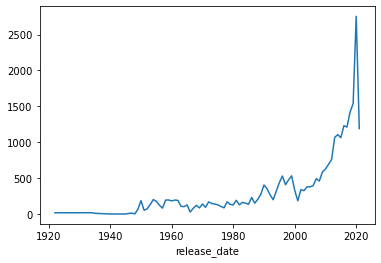

In [73]:
(tracks_artists_nulls.groupby(tracks_artists_nulls['release_date'].map(lambda x: x.year)).count()['id']).plot()

In [75]:
tracks_artists_nulls.duplicated(subset='id').any()

True

In [78]:
artists_df[artists_df['id_artists'] == '2pKBejGoRlzAc5VHQ0R26E']

,id_artists,followers,genres,name_artist,popularity_artist


In [80]:
exploded_tracks_df[exploded_tracks_df['id_artists'] == '2pKBejGoRlzAc5VHQ0R26E']

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
9697,0VHoDqq7N5VH1UX93Mdyfj,Air,0,268400,0,"['n/a', 'Johann Sebastian Bach', 'In Motion']",2pKBejGoRlzAc5VHQ0R26E,1935-01-01,0.317,0.317,2.0,-8.978,1.0,0.0389,0.975,0.9560,0.0868,0.129,66.296,4.0
9719,0cSyeb33PyBMtLeUzCgDgO,concerto piccolo,0,279600,0,"['n/a', 'Nitsch, Johannes', 'In Motion']",2pKBejGoRlzAc5VHQ0R26E,1935-01-01,0.535,0.435,4.0,-9.021,0.0,0.0303,0.732,0.2530,0.1190,0.205,106.124,4.0
9811,1GYoPjJvGyYufhbxZmAKmF,drume negrita,0,182400,0,"['n/a', 'Grenet, Ernesto', 'In Motion']",2pKBejGoRlzAc5VHQ0R26E,1935-01-01,0.628,0.661,0.0,-7.634,1.0,0.0387,0.254,0.2360,0.0572,0.805,96.198,4.0
10034,2nUaz5sLG0HccdACC1IG35,i know that my redeemer liveth,0,236733,0,"['n/a', 'Händel, Georg Friedrich (DP)', 'In Mo...",2pKBejGoRlzAc5VHQ0R26E,1935-01-01,0.492,0.286,3.0,-8.966,1.0,0.0336,0.981,0.8920,0.1430,0.273,87.973,3.0
10036,2oYfdKTcUpk3xJZm0CkHJm,summertime,0,246667,0,"['n/a', 'George Gershwin', 'In Motion']",2pKBejGoRlzAc5VHQ0R26E,1935-01-01,0.341,0.424,9.0,-8.983,0.0,0.0305,0.867,0.8120,0.1600,0.264,151.676,4.0
10115,3Iu3F4rF8PBoRhDqkpayZa,In Motion,0,245800,0,"['n/a', 'Nitsch, Johannes', 'In Motion']",2pKBejGoRlzAc5VHQ0R26E,1935-01-01,0.312,0.433,11.0,-9.457,0.0,0.0424,0.786,0.1210,0.2400,0.251,86.237,4.0
10131,3NWCbI2VtW80g8cZG3QHIx,easy going,0,191867,0,"['n/a', 'Nitsch, Johannes', 'In Motion']",2pKBejGoRlzAc5VHQ0R26E,1935-01-01,0.613,0.549,7.0,-7.648,1.0,0.0327,0.517,0.4440,0.0412,0.583,83.967,4.0
10166,3gWhV34vWEBwguH0RP2w7j,comfort ye my people,0,189560,0,"['n/a', 'Händel, Georg Friedrich (DP)', 'In Mo...",2pKBejGoRlzAc5VHQ0R26E,1935-01-01,0.376,0.332,3.0,-8.420,1.0,0.0296,0.758,0.0482,0.0766,0.260,91.840,4.0
10265,4PABQMdRoYEerJW1rmjTZn,Last day in summer,0,317667,0,"['n/a', 'Nitsch, Johanens', 'In Motion']",2pKBejGoRlzAc5VHQ0R26E,1935-01-01,0.349,0.416,8.0,-9.379,1.0,0.0352,0.903,0.8820,0.1780,0.138,78.115,3.0
10350,4z7TEhZmXEaHCH3tJXs0xR,Back home,0,320800,0,"['n/a', 'Nitsch, Johanens', 'In Motion']",2pKBejGoRlzAc5VHQ0R26E,1935-01-01,0.622,0.484,9.0,-9.426,1.0,0.0271,0.784,0.7670,0.0703,0.371,107.924,4.0


In [82]:
missing_songs_df[missing_songs_df['id'] == '2pKBejGoRlzAc5VHQ0R26E']

,artists,duration_ms,explicit,id,name,popularity,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature


In [81]:
missing_songs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51545 entries, 0 to 51544
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artists           51545 non-null  object 
 1   duration_ms       51545 non-null  int64  
 2   explicit          51545 non-null  bool   
 3   id                51545 non-null  object 
 4   name              51541 non-null  object 
 5   popularity        51545 non-null  int64  
 6   release_date      51545 non-null  object 
 7   danceability      51394 non-null  float64
 8   energy            51394 non-null  float64
 9   key               51394 non-null  float64
 10  loudness          51394 non-null  float64
 11  mode              51394 non-null  float64
 12  speechiness       51394 non-null  float64
 13  acousticness      51394 non-null  float64
 14  instrumentalness  51394 non-null  float64
 15  liveness          51394 non-null  float64
 16  valence           51394 non-null  float6

In [83]:
tracks_df[tracks_df['id_artists'] == '2pKBejGoRlzAc5VHQ0R26E']

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature


In [86]:
complete_tracks_df.head(10)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],[45tIt06XoI0Iio4LBEVpls],1922-02-22,0.645,0.4450,0.0,-13.338,1.0,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3.0
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],[14jtPCOoNZwquk5wd9DxrY],1922-06-01,0.695,0.2630,0.0,-22.136,1.0,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1.0
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],[5LiOoJbxVSAMkBS2fUm3X2],1922-03-21,0.434,0.1770,1.0,-21.180,1.0,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5.0
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],[5LiOoJbxVSAMkBS2fUm3X2],1922-03-21,0.321,0.0946,7.0,-27.961,1.0,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3.0
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],[3BiJGZsyX9sJchTqcSA7Su],1922-01-01,0.402,0.1580,3.0,-16.900,0.0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4.0
5,0BRXJHRNGQ3W4v9frnSfhu,Ave Maria,0,178933,0,['Dick Haymes'],[3BiJGZsyX9sJchTqcSA7Su],1922-01-01,0.227,0.2610,5.0,-12.343,1.0,0.0382,0.994,0.247000,0.0977,0.0539,118.891,4.0
6,0Dd9ImXtAtGwsmsAD69KZT,La Butte Rouge,0,134467,0,['Francis Marty'],[2nuMRGzeJ5jJEKlfS7rZ0W],1922-01-01,0.510,0.3550,4.0,-12.833,1.0,0.1240,0.965,0.000000,0.1550,0.7270,85.754,5.0
7,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,['Mistinguett'],[4AxgXfD7ISvJSTObqm4aIE],1922-01-01,0.563,0.1840,4.0,-13.757,1.0,0.0512,0.993,0.000016,0.3250,0.6540,133.088,3.0
8,0IgI1UCz84pYeVetnl1lGP,Old Fashioned Girl,0,310073,0,['Greg Fieler'],[5nWlsH5RDgFuRAiDeOFVmf],1922-01-01,0.488,0.4750,0.0,-16.222,0.0,0.0399,0.620,0.006450,0.1070,0.5440,139.952,4.0
9,0JV4iqw2lSKJaHBQZ0e5zK,Martín Fierro - Remasterizado,0,181173,0,['Ignacio Corsini'],[5LiOoJbxVSAMkBS2fUm3X2],1922-03-29,0.548,0.0391,6.0,-23.228,1.0,0.1530,0.996,0.933000,0.1480,0.6120,75.595,3.0


In [89]:
complete_tracks_df[complete_tracks_df['id_artists'] == '[2pKBejGoRlzAc5VHQ0R26E]']

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature


In [90]:
complete_tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 638053 entries, 0 to 51544
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                638053 non-null  object 
 1   name              638053 non-null  object 
 2   popularity        638053 non-null  int64  
 3   duration_ms       638053 non-null  int64  
 4   explicit          638053 non-null  int64  
 5   artists           638053 non-null  object 
 6   id_artists        638053 non-null  object 
 7   release_date      638053 non-null  object 
 8   danceability      638053 non-null  float64
 9   energy            638053 non-null  float64
 10  key               638053 non-null  float64
 11  loudness          638053 non-null  float64
 12  mode              638053 non-null  float64
 13  speechiness       638053 non-null  float64
 14  acousticness      638053 non-null  float64
 15  instrumentalness  638053 non-null  float64
 16  liveness          638

In [96]:
tracks_artists_df['id_artists'].size

808551

In [93]:
tracks_artists_df['id_artists'][0]

'45tIt06XoI0Iio4LBEVpls'

In [98]:
tracks_df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922-01-01,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [104]:
tracks_df.loc[[586657]]

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
586657,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.615,10,-6.212,1,0.0345,0.206,0.000003,0.305,0.438,90.029,4


In [105]:
tracks_artists_df[tracks_artists_df['id'] == '45XJsGpFTyzbzeWK8VzR8S']

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,genres,popularity_artist
757154,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']",4jGPdu95icCKVF31CcFKbS,2021-03-05,0.696,0.615,...,0.0345,0.206,0.000003,0.305,0.438,90.029,4.0,45309.0,"['chill r&b', 'indie cafe pop', 'singaporean p...",58.0
757155,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']",5ebPSE9YI5aLeZ1Z2gkqjn,2021-03-05,0.696,0.615,...,0.0345,0.206,0.000003,0.305,0.438,90.029,4.0,93797.0,"['opm', 'pinoy indie', 'pinoy singer-songwriter']",53.0


In [106]:
tracks_artists_df.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,popularity_artist
count,808551.000000,8.085510e+05,808551.000000,808551.000000,808551.000000,808551.000000,808551.000000,808551.000000,808551.000000,808551.000000,808551.000000,808551.000000,808551.000000,808551.000000,808551.000000,7.801980e+05,780200.000000
mean,26.370821,2.361346e+05,0.061362,0.556855,0.529487,5.204784,-10.473266,0.659107,0.108927,0.465910,0.124901,0.214985,0.528793,117.584327,3.866483,1.125640e+06,50.156133
std,19.173304,1.474729e+05,0.239993,0.174669,0.260300,3.518574,5.541938,0.474010,0.179413,0.359411,0.279230,0.184188,0.262888,29.853343,0.491394,4.066397e+06,20.560075
min,0.000000,2.293000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,9.000000,1.759730e+05,0.000000,0.439000,0.319000,2.000000,-13.378500,0.000000,0.034900,0.097900,0.000000,0.098900,0.317000,94.642000,4.000000,6.739000e+03,37.000000
50%,26.000000,2.163470e+05,0.000000,0.573000,0.540000,5.000000,-9.264000,1.000000,0.046000,0.442000,0.000029,0.139000,0.537000,116.289000,4.000000,7.769500e+04,52.000000
75%,40.000000,2.673470e+05,0.000000,0.687000,0.745000,8.000000,-6.373000,1.000000,0.083200,0.825000,0.015100,0.279000,0.748000,135.870500,4.000000,5.719590e+05,65.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000,7.890023e+07,100.000000


<AxesSubplot:ylabel='Density'>

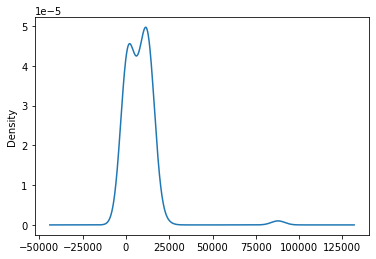

In [109]:
popular_tracks = tracks_artists_df.popularity.value_counts()
popular_tracks.plot.density()

<AxesSubplot:>

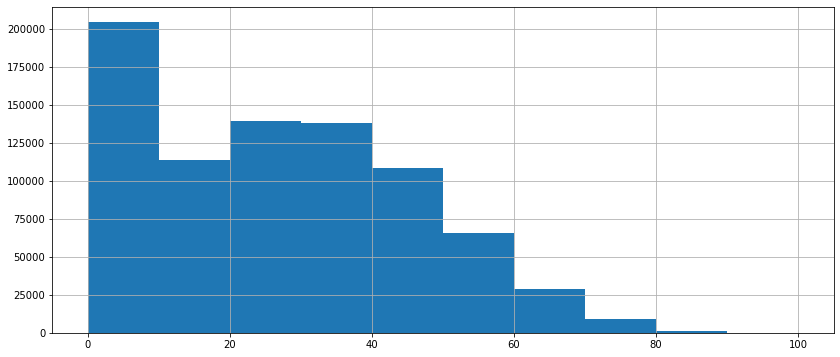

In [111]:
tracks_artists_df.popularity.hist(figsize=[14,6])

<AxesSubplot:ylabel='Density'>

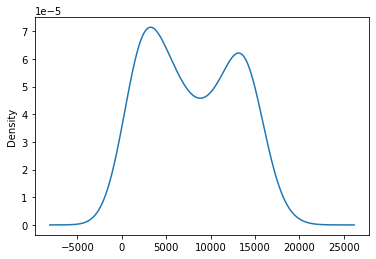

In [110]:
popular_artists = tracks_artists_df.popularity_artist.value_counts()
popular_artists.plot.density()

<AxesSubplot:>

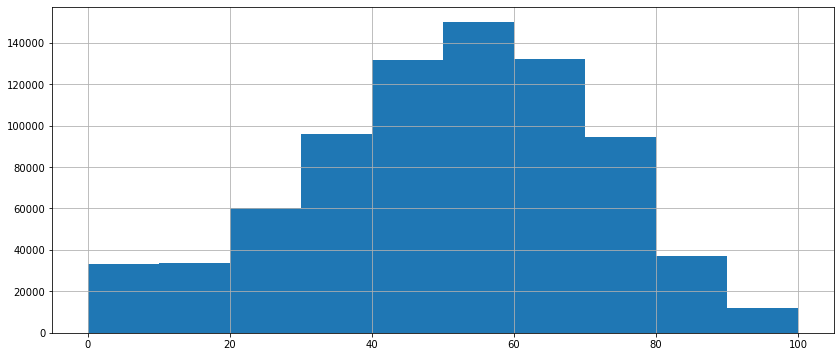

In [112]:
tracks_artists_df.popularity_artist.hist(figsize=[14,6])

In [125]:
above_fifty = tracks_artists_df[tracks_artists_df.popularity >= 30].count()["id"]
above_fifty

351435

In [126]:
less_fifty = tracks_artists_df[tracks_artists_df.popularity < 30].count()["id"]
less_fifty

457116

In [122]:
above_fifty_artists = tracks_artists_df[tracks_artists_df.popularity_artist >= 50].count()["id"]
above_fifty_artists

425462

In [118]:
less_fifty_artists = tracks_artists_df[tracks_artists_df.popularity_artist < 50].count()["id"]
less_fifty_artists

354738

In [ ]:
# Verify which artists will null in artists_df, drop NaN rows
# Add a column with the number of artists in track: 1: Use delimiter (comma) to count, 2: get the column as a list, get the len of each row, map it to a new column, 3: count string, divide

missing_songs_df.info()